# <font color=black> Analysis - Resting state duration in the spinal cord </font>
<hr style="border:1px solid black">

**The goal of this analysis is to investigate the reproducibility of spinal networks extracted using different resting state duration.**

**METHODS CONSIDERED:**
- Independent Component Analysis – called `ica` in this script
- Innovation-driven CoActivation Pattern analysis – called `icap` in this script

**DATASETS:**
- A dataset covering C1 to C8 spinal levels, with a resolution of 1.6x1.6x4mm<sup>3</sup>  and a TR of 1.55s – called `mtl` in this script
- A dataset covering C5 to C8 spinal levels, with a resolution of 1x1x3mm<sup>3</sup> and a TR of 2.5s – called `gva` in this script

**DURATION CONSIDERED:**
- mtl: 1,2,3,4 and 5 minutes + 6 minutes as the reference  
- gva: 1,2,3,4,5,6,9 and 12 minutes + 15 minutes as the reference  

**ANALYSES:**
- _**Qualitative:**_ matching & visualization of one or two set(s) of components
- _**Quantitative:**_Analysis of spatial similarity (for a single K, or across multiple Ks)
    

In [62]:
import sys,json

sys.path.append('/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project/hc_project_analyses/code/')

from plotting import Plotting
from spine_only_analysis_RSduration import SpineOnlyAnalysis

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Initialization

### Load configuration file 

In [73]:
# Load the config files with all informations (i.e., all datasets, methods, etc.)
with open('../config/config_spine_only_CL.json') as config_file:
    config = json.load(config_file)

# Qualitative evaluation

### Create instance of class

### Visualizing components
_Note: the component numbers refer to the ones of the original datasets (i.e., before any type of reordering)_

# Quantitative analyses

## Within-dataset comparison

### `GVA` dataset

### Instantiate class
Note: the idea is to load all the possible K only once when instantiating the class

In [74]:
t_range

[1, 2, 3, 4, 5]

In [94]:
# Define parameters for the datasets to compare
# Each param dict has 3 values: k_range, dataset and analysis
dataset="gva"
t_range=config[ "ica_ana"]["rs_duration"][dataset]
params_quant_gva_1 = {'k_range':range(5,6),'dataset':dataset, 'analysis':"ica",'t_range':None}
params_quant_gva_2 = {'k_range':range(5,6), 'dataset':dataset, 'analysis':"ica_duration", 't_range': t_range}

spine_analysis_gva = SpineOnlyAnalysis(config,params1=params_quant_gva_1,params2=params_quant_gva_2)

### Analyze spatial similarity
**Spatial similarity can be explored in two different ways:**
1. To obtain a similarity matrix for a particular K per condition
> In that case, pass `k1` (and `k2`if different) as arguments <br>
2. To look at the evolution of the mean similarity across different Ks
> In that case, pass `k_range` as argument

#### Matching is not great for low K, but good otherwise

In [92]:
# Load the config files with all informations (i.e., all datasets, methods, etc.)
with open('../config/config_spine_only_CL.json') as config_file:
    config = json.load(config_file)

METHOD 3: Comparing different sets of components at specific K values
... Computing similarity for K=5 between t=1 min and t=15 min
... Computing similarity for K=5 between t=2 min and t=15 min
... Computing similarity for K=5 between t=3 min and t=15 min
... Computing similarity for K=5 between t=4 min and t=15 min
... Computing similarity for K=5 between t=5 min and t=15 min
... Computing similarity for K=5 between t=6 min and t=15 min
... Computing similarity for K=5 between t=9 min and t=15 min


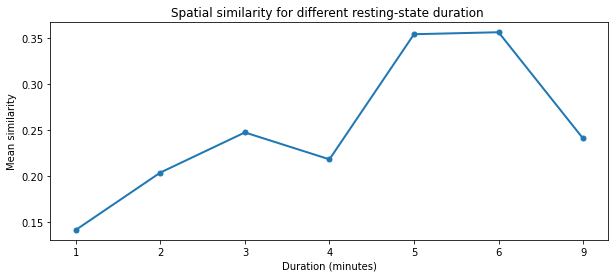

In [95]:
# Similarity has been computed using 'Dice', but 'Cosine' or 'Euclidean distance' could be used instad
spine_analysis_gva.spatial_similarity(k1=5,t_range1=15,t_range2=t_range,similarity_method='Dice')

In [57]:
spine_analysis_gva.spatial_similarity(k1=20,similarity_method='Dice')

METHOD 1: Comparing two sets of components at specific K values 
mtl_ica at K = 20 vs mtl_ica_duration at K = 20 



KeyError: 20

### Investigate axial distribution for different Ks

### `ICA` method

### Instantiate class

### Instantiate class

In [236]:
# Define parameters for the datasets to compare
# Each param dict has 3 values: k_range, dataset and analysis
params_quant_icap_1 = {'k_range':range(4,41), 'dataset':'gva', 'analysis':'icap'}
params_quant_icap_2 = {'k_range':range(4,41), 'dataset':'mtl', 'analysis':'icap'}

spine_analysis_icap = SpineOnlyAnalysis(config,params1=params_quant_icap_1,params2=params_quant_icap_2)

### Analyze spatial similarity

#### Not great for low K, good for high K

METHOD 1: Comparing two sets of components at specific K values 
gva_icap at K = 4 vs mtl_icap at K = 8 

The mean similarity is 0.65


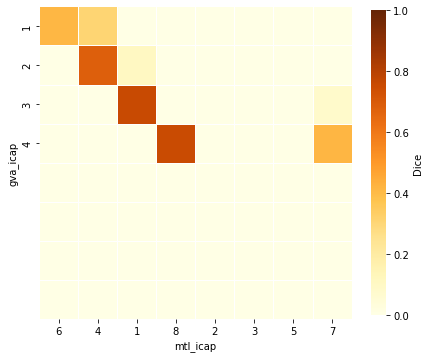

In [237]:
spine_analysis_icap.spatial_similarity(k1=4,k2=8,similarity_method='Dice')

METHOD 1: Comparing two sets of components at specific K values 
gva_icap at K = 20 vs mtl_icap at K = 40 

The mean similarity is 0.54


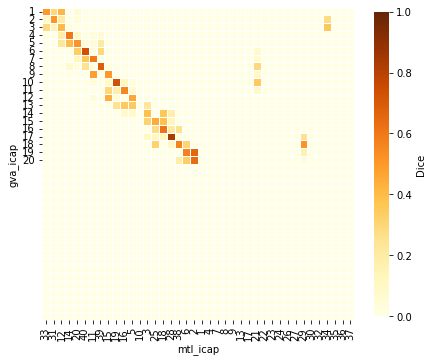

In [238]:
spine_analysis_icap.spatial_similarity(k1=20,k2=40,similarity_method='Dice')